## Import

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_fontja

In [107]:
import datetime as dt

In [109]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, cross_validate, train_test_split

In [111]:
import seaborn as sns
import itertools

In [113]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from scipy.spatial.distance import squareform

In [115]:
import optuna
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [116]:
import statsmodels.api as sm

## データ開く

In [119]:
#ファイルを開く（前処理はExcel上で行いました。。。）
data = pd.read_csv('C:/Users/mn_sn/data.csv', encoding = "shift-jis", index_col = '年月日', parse_dates=['年月日'])

In [120]:
#線形補完
data.interpolate()

#各補完方法
#print(df.fillna({'平均気温(℃)': 20, '降水量の合計(mm)': 100})) #それぞれのカラムごとに補完値を設定
#print(df.fillna(df.mean(numeric_only=True))) #平均値で補完
#print(df.fillna(df.mode().iloc[0])) #最頻値で補完
#print(df.ffill()) #前の値で置換
#print(df.bfill()) #後の値で置換

data

,平均気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均湿度(％),平均雲量(10分比)
年月日,,,,,,
2020-01-01,5.5,0.0,7.4,2.6,49,3.0
2020-01-02,6.2,0.0,5.7,1.8,60,1.0
2020-01-03,6.1,0.0,8.8,1.4,63,0.0
2020-01-04,7.2,0.0,3.4,2.3,53,5.5
2020-01-05,5.4,1.0,8.9,3.0,61,0.0
...,...,...,...,...,...,...
2023-12-27,8.4,0.0,4.4,2.8,50,9.0
2023-12-28,7.0,0.0,6.2,1.9,56,6.3
2023-12-29,7.8,0.0,8.9,1.6,61,0.0


## EDA

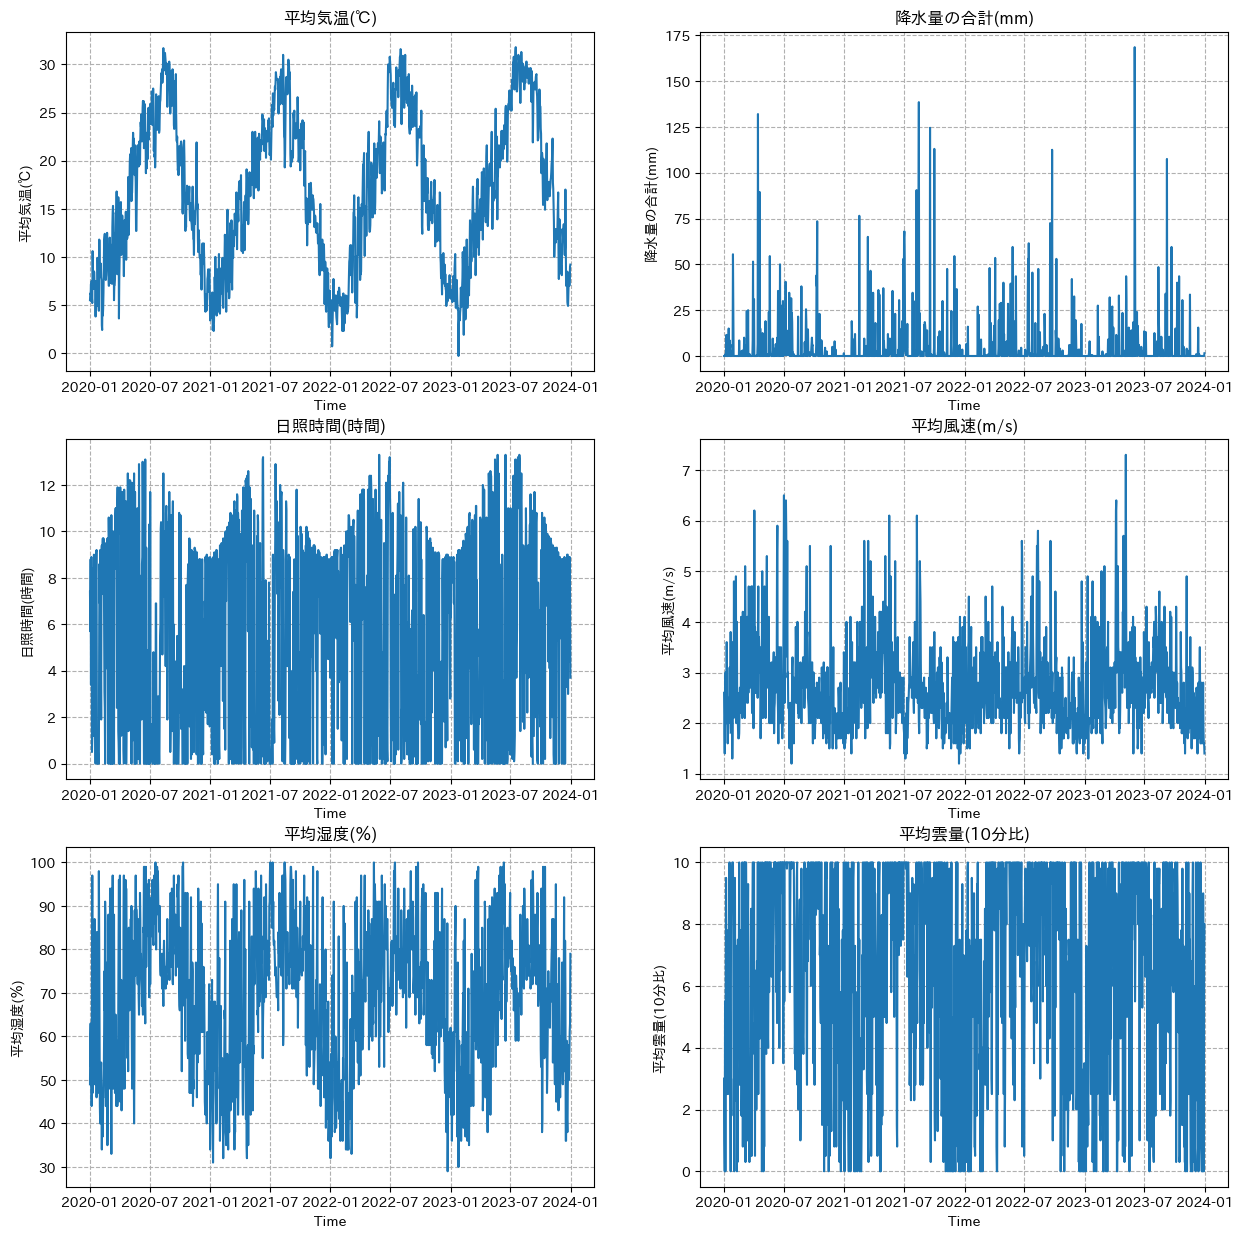

In [123]:
#グラフの描画(時系列グラフ)

fig = plt.figure(figsize=(15, 15))

ax0 = fig.add_subplot(3,2,1)
ax1 = fig.add_subplot(3,2,2)
ax2 = fig.add_subplot(3,2,3)
ax3 = fig.add_subplot(3,2,4)
ax4 = fig.add_subplot(3,2,5)
ax5 = fig.add_subplot(3,2,6)

line0 = ax0.plot(data['平均気温(℃)'], label='平均気温(℃)')
line1 = ax1.plot(data['降水量の合計(mm)'], label='降水量の合計(mm)')
line2 = ax2.plot(data['日照時間(時間)'], label='日照時間(時間)')
line3 = ax3.plot(data['平均風速(m/s)'], label='平均風速(m/s)')
line4 = ax4.plot(data['平均湿度(％)'], label='平均湿度(％)')
line5 = ax5.plot(data['平均雲量(10分比)'], label='平均雲量(10分比)')

ax0.set_xlabel('Time')
ax0.set_ylabel('平均気温(℃)')
ax0.set_title('平均気温(℃)')
ax0.grid(linestyle='--')

ax1.set_xlabel('Time')
ax1.set_ylabel('降水量の合計(mm)')
ax1.set_title('降水量の合計(mm)')
ax1.grid(linestyle='--')

ax2.set_xlabel('Time')
ax2.set_ylabel('日照時間(時間)')
ax2.set_title('日照時間(時間)')
ax2.grid(linestyle='--')

ax3.set_xlabel('Time')
ax3.set_ylabel('平均風速(m/s)')
ax3.set_title('平均風速(m/s)')
ax3.grid(linestyle='--')

ax4.set_xlabel('Time')
ax4.set_ylabel('平均湿度(％)')
ax4.set_title('平均湿度(％)')
ax4.grid(linestyle='--')

ax5.set_xlabel('Time')
ax5.set_ylabel('平均雲量(10分比)')
ax5.set_title('平均雲量(10分比)')
ax5.grid(linestyle='--')

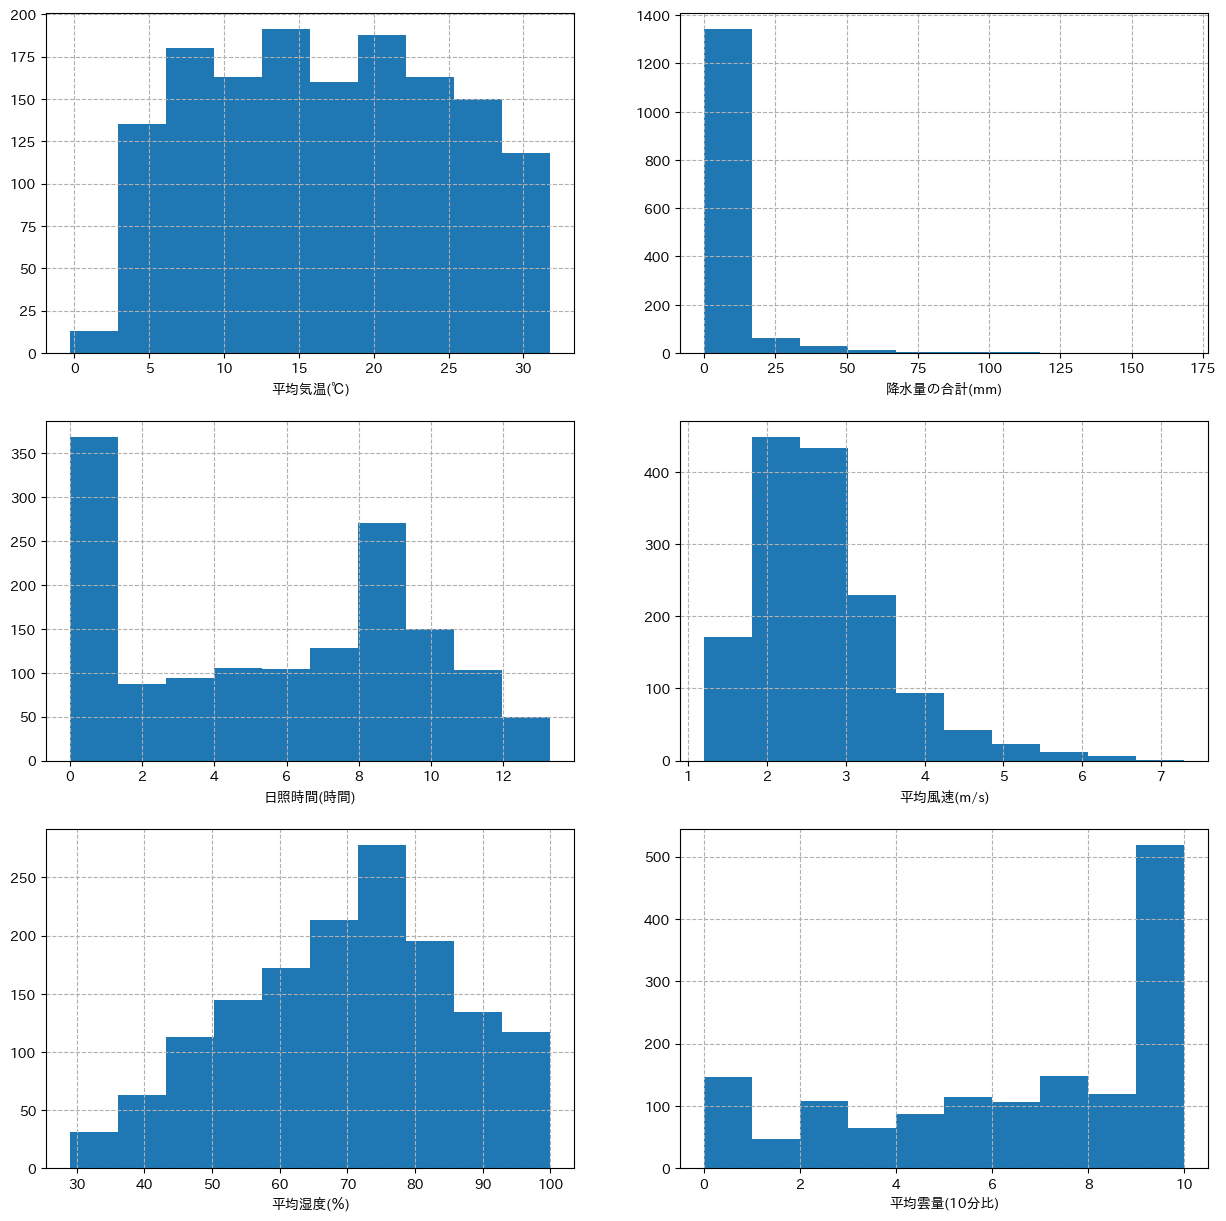

In [124]:
#グラフの描画（ヒストグラム）

fig = plt.figure(figsize=(15, 15))

ax0 = fig.add_subplot(3,2,1)
ax1 = fig.add_subplot(3,2,2)
ax2 = fig.add_subplot(3,2,3)
ax3 = fig.add_subplot(3,2,4)
ax4 = fig.add_subplot(3,2,5)
ax5 = fig.add_subplot(3,2,6)

line0 = ax0.hist(data['平均気温(℃)'], label='平均気温(℃)')
line1 = ax1.hist(data['降水量の合計(mm)'], label='降水量の合計(mm)')
line2 = ax2.hist(data['日照時間(時間)'], label='日照時間(時間)')
line3 = ax3.hist(data['平均風速(m/s)'], label='平均風速(m/s)')
line4 = ax4.hist(data['平均湿度(％)'], label='平均湿度(％)')
line5 = ax5.hist(data['平均雲量(10分比)'], label='平均雲量(10分比)')

ax0.set_xlabel('平均気温(℃)')
ax0.grid(linestyle='--')

ax1.set_xlabel('降水量の合計(mm)')
ax1.grid(linestyle='--')

ax2.set_xlabel('日照時間(時間)')
ax2.grid(linestyle='--')

ax3.set_xlabel('平均風速(m/s)')
ax3.grid(linestyle='--')

ax4.set_xlabel('平均湿度(％)')
ax4.grid(linestyle='--')

ax5.set_xlabel('平均雲量(10分比)')
ax5.grid(linestyle='--')

Text(0, 0.5, 'Corerration')

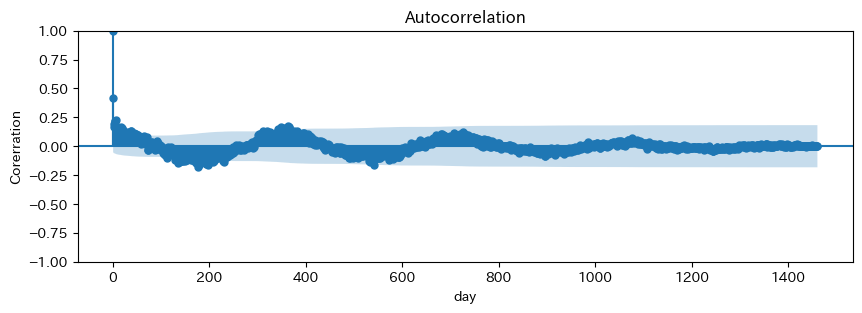

In [125]:
#自己相関
fig = plt.figure(figsize=(10, 3))

ax = fig.add_subplot(1,1,1)

sm.graphics.tsa.plot_acf(data['平均雲量(10分比)'], lags=len(data)-1, ax=ax)

ax.set_xlabel('day')
ax.set_ylabel('Corerration')

In [126]:
#統計量
data.describe()

,平均気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均湿度(％),平均雲量(10分比)
count,1461.000000,1461.000000,1459.000000,1461.000000,1461.000000,1461.000000
mean,16.839357,4.554757,5.666484,2.730116,69.529090,6.477823
std,7.883054,13.979011,4.074218,0.853869,16.011298,3.338101
min,-0.300000,0.000000,0.000000,1.200000,29.000000,0.000000
25%,10.100000,0.000000,1.300000,2.100000,58.000000,3.800000
50%,16.700000,0.000000,6.300000,2.600000,71.000000,7.300000
75%,23.200000,1.500000,9.100000,3.100000,81.000000,9.800000
max,31.800000,168.500000,13.300000,7.300000,100.000000,10.000000


## ラグデータ作成

In [129]:
# _datからi週間前のラグデータを生成

#def submat(i, _dat):
    #z = _dat.shift(-i)
    #z.columns = ['{0}_lag{1}'.format(j, i) for j in _dat.columns]
    #return z

In [130]:
#day = 2

In [131]:
#t = ['平均気温(℃)',	'降水量の合計(mm)', '日照時間(時間)', '平均風速(m/s)', '平均湿度(％)', '平均雲量(10分比)']
#test_data = pd.concat([submat(day, data[t])], axis=1)
#test_data

## 対数変換

In [136]:
#data = np.log(data+1)
#data

## 訓練データ・テストデータ分割（スケーリング込み）

In [140]:
#学習データ(2020~2022年)のindexの数
total_time = data.loc['2020':'2022'].shape[0]
total_time

1096

In [141]:
# 説明変数部分を取り出してscaleで標準化
#scaler_X = StandardScaler()
#X = data.iloc[:, :-1]
#X = pd.DataFrame(scaler_X.fit_transform(X),columns=data.columns[:-1])
X = pd.DataFrame(scale(data.iloc[:, :-1]), columns=data.columns[:-1])
X_train = X.iloc[:total_time]
X_test = X.iloc[total_time:]

In [142]:
#元に戻すとき
#X_inverse = pd.DataFrame(scaler_X.inverse_transform(X),columns=data.columns[:-1])
#X_inverse

In [143]:
# 予測変数部分を取り出し
#scaler_y = StandardScaler()
#y = data.iloc[:, -1:]
#y = pd.DataFrame(scaler_y.fit_transform(y),columns=data.columns[-1:])
y = data.iloc[:, -1:]
y_train = y.iloc[:total_time]
y_test = y.iloc[total_time:]

In [144]:
#元に戻すとき
#y_inverse = pd.DataFrame(scaler_y.inverse_transform(y))
#y_inverse

In [145]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [147]:
#説明変数(訓練データ)
X_train = X_train.reset_index(drop=True)
X_train.head()

,平均気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均湿度(％)
0,-1.438940,-0.32594,0.425630,-0.152437,-1.282602
1,-1.350111,-0.32594,0.008229,-1.089669,-0.595352
2,-1.362801,-0.32594,0.769372,-1.558286,-0.407920
3,-1.223213,-0.32594,-0.556490,-0.503899,-1.032693
4,-1.451629,-0.25438,0.793925,0.316180,-0.532874


In [148]:
#説明変数(テストデータ)
X_test = X_test.reset_index(drop=True)
X_test.head()

,平均気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均湿度(％)
0,-1.299352,-0.32594,0.769372,-1.206823,-0.470397
1,-1.350111,-0.32594,0.155547,-0.738207,-1.157647
2,-1.400870,-0.32594,0.793925,-0.621053,-1.719943
3,-1.426250,-0.32594,0.671160,-0.152437,-1.407556
4,-1.388181,-0.32594,0.769372,0.550488,-2.094806


In [149]:
#目的変数(訓練データ)
y_train = y_train.reset_index(drop=True)
y_train.head()

,平均雲量(10分比)
0,3.0
1,1.0
2,0.0
3,5.5
4,0.0


In [150]:
#目的変数(テストデータ)
y_test = y_test.reset_index(drop=True)
y_test.head()

,平均雲量(10分比)
0,0.0
1,2.0
2,1.0
3,1.5
4,0.0


## 変数選択

In [153]:
#変数同士の相関係数を見る
corr = pd.DataFrame(X.corr()) 
cm = sns.light_palette("red", as_cmap=True)
corr.style.background_gradient(cmap=cm)

,平均気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),平均湿度(％)
平均気温(℃),1.000000,0.043078,0.014570,0.220597,0.501490
降水量の合計(mm),0.043078,1.000000,-0.376204,0.050295,0.447078
日照時間(時間),0.014570,-0.376204,1.000000,0.187018,-0.620851
平均風速(m/s),0.220597,0.050295,0.187018,1.000000,-0.130943
平均湿度(％),0.501490,0.447078,-0.620851,-0.130943,1.000000


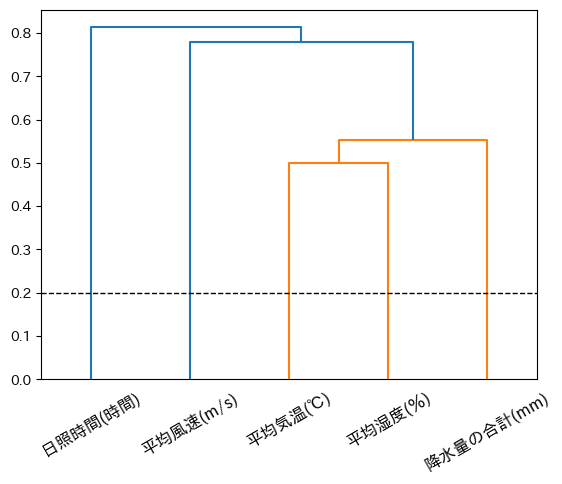

In [154]:
#変数同士のクラスタリング（マルチコ防止）
d = squareform(1 - X.corr())
Z = linkage(d, "single", optimal_ordering=True)

dendrogram(Z, labels=X.columns)
plt.axhline(0.2, c="black", ls="--", lw=1)
plt.xticks(rotation=30)

plt.show()

## LightGBM(パラメーター調整)

In [268]:
def get_lgbm_bestparams(data, score_func, n_trials=100, direction="minimize"):
    X_train = data['X_train']
    y_train = data['y_train']
    X_test = data['X_test']
    y_test = data['y_test']
    #optuna.logging.set_verbosity(optuna.logging.ERROR)
    def objective(trial):
        param = {
            'objective':'regression',
            'boosting':'gbdt',
            'metric':'rmse',
            'random_state':0,
            'num_leaves': trial.suggest_int('num_leaves', 2, 255),
            'max_depth':trial.suggest_int('max_depth', 3, 20),
            'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1.0),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0), 
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0),
            'feature_fraction':trial.suggest_float('feature_fraction', 0.3, 1.0),
            'bagging_fraction':trial.suggest_float('bagging_fraction', 0.3, 1.0),
            'bagging_freq':trial.suggest_int('bagging_freq', 1, 10),
        }
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return score_func(y_test, y_pred)

        #kf = KFold(n_splits=5, shuffle=True, random_state=0)
        #scores = cross_validate(model, X=X_train, y=y_train, scoring='r2', cv=kf)
        #return scores['test_score'].mean()

    study = optuna.create_study(direction=direction, sampler=optuna.samplers.TPESampler(seed=0))
    study.optimize(objective, n_trials=n_trials)
    trial = study.best_trial
    return trial.params

In [298]:
model = LGBMRegressor(verbosity=-1)

In [300]:
data0 = {'X_train': X_train, 'y_train': y_train,
        'X_test': X_test, 'y_test': y_test}

def rmse(y_true, y_pred):
    return root_mean_squared_error(y_true, y_pred)

lgbm_params = get_lgbm_bestparams(data0, rmse, n_trials=100, direction="minimize")

In [302]:
lgbm_params

{'num_leaves': 141,
 'max_depth': 15,
 'learning_rate': 0.6027673484378832,
 'min_child_samples': 57,
 'reg_alpha': 4.236547999152498,
 'reg_lambda': 6.4589411342076195,
 'feature_fraction': 0.6063110478838847,
 'bagging_fraction': 0.9242411005474558,
 'bagging_freq': 10}

In [304]:
keys = ['objective', 'boosting', 'metric', 'verbosity','random_state']
values = ['regression', 'gbdt', 'rmse', -1, 0]
lgbm_params.update(zip(keys, values))
lgbm_params

{'num_leaves': 141,
 'max_depth': 15,
 'learning_rate': 0.6027673484378832,
 'min_child_samples': 57,
 'reg_alpha': 4.236547999152498,
 'reg_lambda': 6.4589411342076195,
 'feature_fraction': 0.6063110478838847,
 'bagging_fraction': 0.9242411005474558,
 'bagging_freq': 10,
 'objective': 'regression',
 'boosting': 'gbdt',
 'metric': 'rmse',
 'verbosity': -1,
 'random_state': 0}

## 学習（気象変数から雲量を予測）

In [308]:
model = LGBMRegressor(**lgbm_params)
#model = LGBMRegressor()

In [310]:
model.fit(X_train, y_train)

y_pred_tr = model.predict(X_train)
y_pred = model.predict(X_test)

## 図の描画

In [314]:
#Datafrmeに変換
y_pred_tr = pd.DataFrame(y_pred_tr)
y_pred = pd.DataFrame(y_pred)

Text(0.5, 1.0, 'Test')

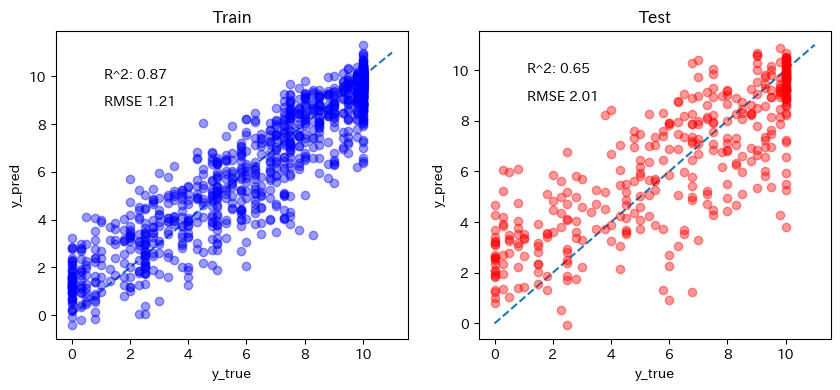

In [316]:
fig = plt.figure(figsize=(10, 4))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

q = 1.1 * np.max(y_train) #適宜変更
ax0.plot([0, q], [0, q], '--')
ax1.plot([0, q], [0, q], '--')

ax0.plot(y_train, y_pred_tr, 'o', c='blue', alpha=0.4) #適宜変更
ax1.plot(y_test, y_pred, 'o', c='red', alpha=0.4) #適宜変更

ax0.text(0.1*q,0.9*q,'R^2: {:.2f}'.format(r2_score(y_train, y_pred_tr))) #適宜変更
ax1.text(0.1*q,0.9*q,'R^2: {:.2f}'.format(r2_score(y_test, y_pred))) #適宜変更

ax0.text(0.1*q, 0.8*q, 'RMSE {:.2f}'.format(root_mean_squared_error(y_train, y_pred_tr))) #適宜変更
ax1.text(0.1*q, 0.8*q, 'RMSE {:.2f}'.format(root_mean_squared_error(y_test, y_pred))) #適宜変更

ax0.set_xlabel('y_true')
ax0.set_ylabel('y_pred')
ax0.set_title('Train')

ax1.set_xlabel('y_true')
ax1.set_ylabel('y_pred')
ax1.set_title('Test')

In [317]:
#時系列のindex追加
data0 = data.loc['2023']
y_test.index = data0.index
y_pred.index = data0.index

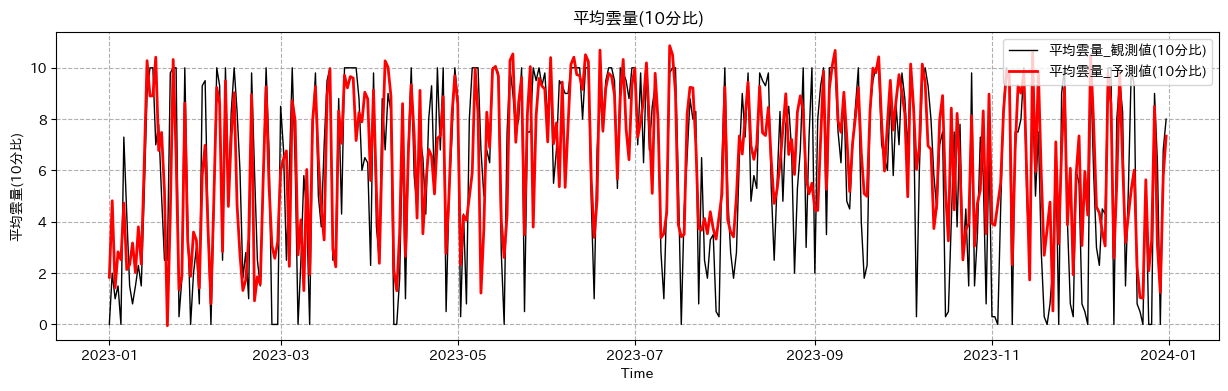

In [286]:
fig = plt.figure(figsize=(15, 4))

ax = fig.add_subplot(1,1,1)

line0 = ax.plot(y_test, label='平均雲量_観測値(10分比)', color='black', linewidth = 1)
line1 = ax.plot(y_pred, label='平均雲量_予測値(10分比)', color='red',linewidth = 2)

ax.set_xlabel('Time')
ax.set_ylabel('平均雲量(10分比)')

ax.set_title('平均雲量(10分比)')
ax.grid(linestyle='--')
ax.legend(loc='upper right')

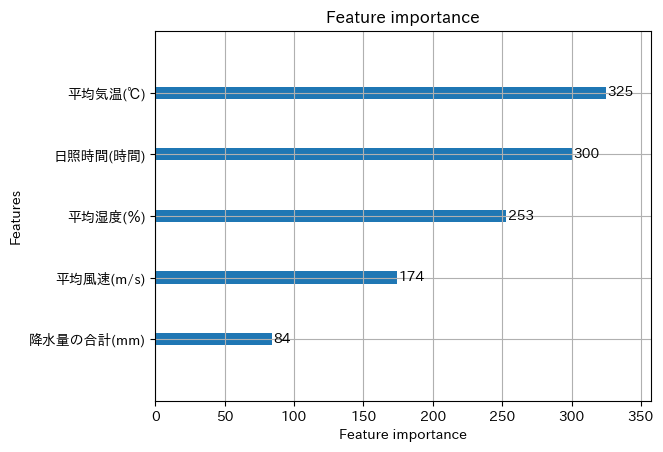

In [287]:
lgb.plot_importance(model, max_num_features=15)
plt.show()